
@Author: Ayush Prajapati<br>
@Date: 27-09-2024<br>
@Last Modified by: Ayush Prajapati<br>
@Last Modified time: 27-09-2024 <br>
@Title: Python program to predict user will click the ad or not
        based on his experience and estimated salary
        using `Logistic Regression`<br>



### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Importing data

In [5]:
salary_df = pd.read_csv('/content/Social_Network_Ads.csv')
display(salary_df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Display Stats

In [6]:
salary_df.info()
print("\nStats for the dataset are:")
salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

Stats for the dataset are:


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Data Visualization

**Pairplot**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

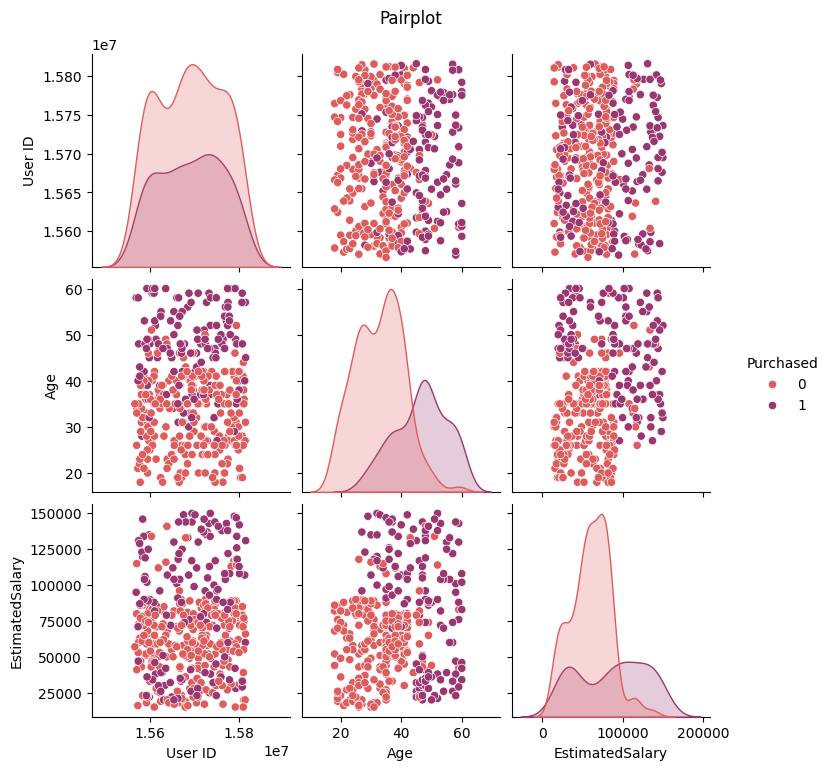

In [7]:
sns.pairplot(salary_df, diag_kind='kde', hue="Purchased", palette='flare')

plt.suptitle('Pairplot', y=1.02)
plt.show()

**Scatterplot**

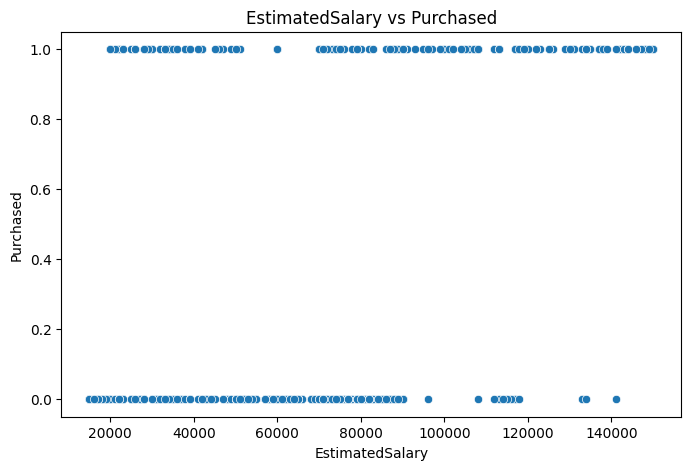

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='EstimatedSalary', y='Purchased', data=salary_df)
plt.title('EstimatedSalary vs Purchased')
plt.show()

**Box plot for detecting outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

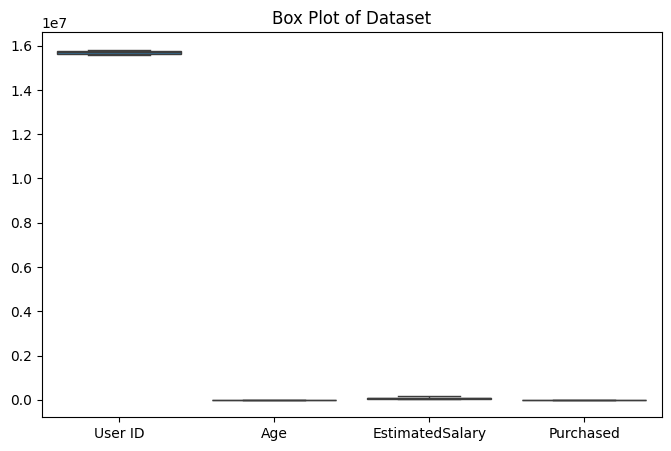

In [13]:
# Box plot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=salary_df)
plt.title('Box Plot of Dataset')
plt.show()

**Visualize the distribution of Age and Estimated Salary**

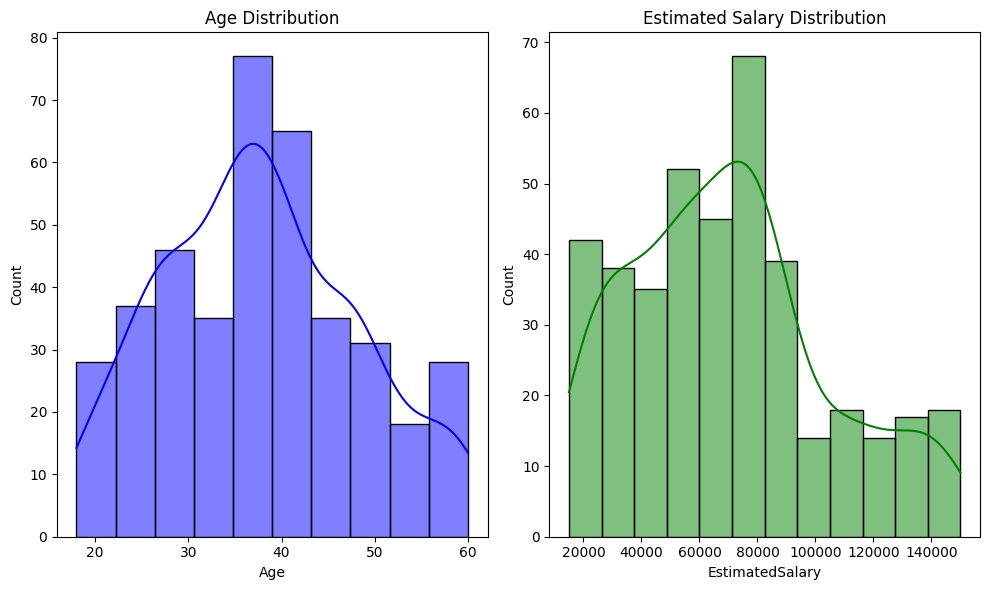

In [21]:
plt.figure(figsize=(10, 6))

# Plotting histograms of 'Age' and 'EstimatedSalary'
plt.subplot(1, 2, 1)
sns.histplot(salary_df['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(salary_df['EstimatedSalary'], kde=True, color='green')
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

### Encoding the data

In [17]:
label_encoder = LabelEncoder()
salary_df['Gender'] = label_encoder.fit_transform(salary_df['Gender'])

### Display Correlation Matrix

In [18]:
correlation_matrix = salary_df.drop(columns = ['User ID']).corr()
print(correlation_matrix)

                   Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000


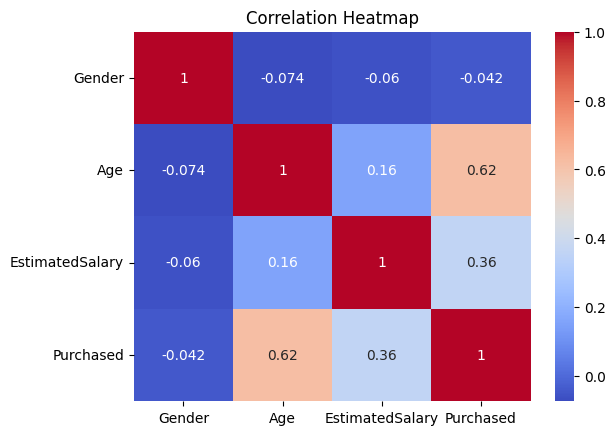

In [19]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Training

**Define Features and Target**

In [38]:
X = salary_df[['Age', 'EstimatedSalary', 'Gender']]
y = salary_df['Purchased']

**Split the dataset into training and testing sets**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**Feature scaling using StandardScaler**

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fit the model**

In [41]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Predicting the test results**

In [42]:
y_pred = model.predict(X_test)

**Displaying Metrics**

In [43]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [44]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 91.25%
Confusion Matrix:
[[56  2]
 [ 5 17]]


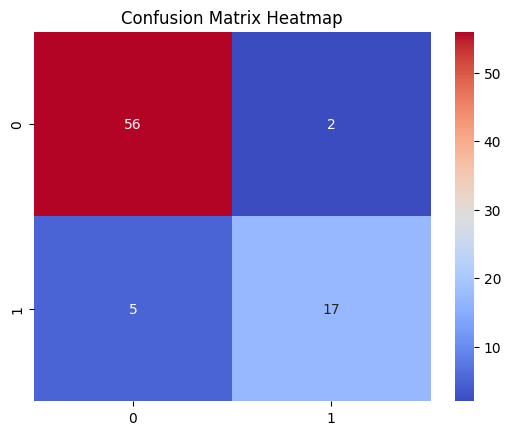

In [45]:
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [46]:
print(f'The report of the model is:\n{report}')

The report of the model is:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [47]:
X_test = scaler.inverse_transform(X_test)

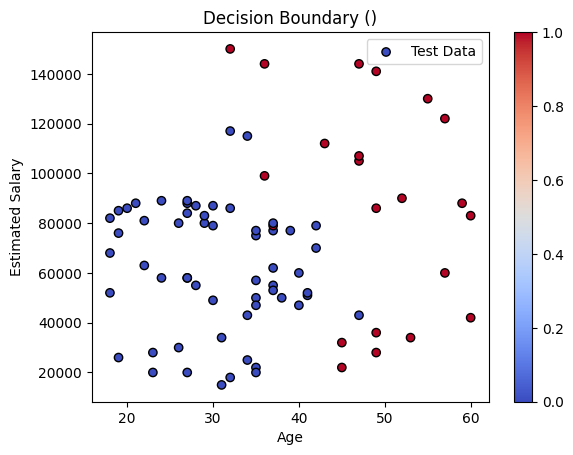

In [48]:
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm', label='Test Data')
plt.colorbar(scatter)
plt.title(f'Decision Boundary ()')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()